In [44]:
import pandas as pd

In [45]:
import seaborn as sns

In [46]:
tips = sns.load_dataset('tips')

In [47]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
import statsmodels.formula.api as smf

In [49]:
model = smf.ols('tip ~ total_bill', data=tips)

In [50]:
results = model.fit()

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           6.69e-34
Time:                        15:44:52   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
results.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

In [53]:
from sklearn import linear_model   #使用sklearn

In [54]:
lr = linear_model.LinearRegression()

In [55]:
predicted = lr.fit(X=tips[['total_bill']], y=tips['tip'])
predicted.coef_

array([0.10502452])

In [56]:
predicted = lr.fit(X=tips['total_bill'].values.reshape(-1, 1),
                   y=tips['tip'])

In [57]:
predicted.coef_

array([0.10502452])

In [58]:
predicted.intercept_

0.9202696135546731

In [59]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [60]:
model = smf.ols('tip ~ total_bill + sex', data=tips).fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.18e-32
Time:                        15:44:52   Log-Likelihood:                -350.52
No. Observations:                 244   AIC:                             707.0
Df Residuals:                     241   BIC:                             717.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9067      0.175      5.182      0.000       0.562       1.251
sex[T.Female]     0.0266      0.138      0.192      0.848      -0.246       0.299
total_bill        0.1052      0.007     14.110      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.499   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.652
Skew:                           0.447   Prob(JB):                     4.05e-09
Kurtosis:                       4.733   Cond. No.                         63.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model = smf.ols(formula='tip ~ total_bill + size + sex + smoker + day + time',data=tips).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.20e-28
Time:                        15:44:52   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.

In [162]:
lr = linear_model.LinearRegression() #使用sklearn

In [163]:
#predicted = lr.fit(tips[['total_bill', 'sex']], tips['tip'])

In [164]:
tips_dummy = pd.get_dummies(tips[['total_bill', 'sex', 'tip']]) #Convert categorical variable into dummy/indicator variables.

In [165]:
tips_dummy.head()

,total_bill,tip,sex_Male,sex_Female
0,16.99,1.01,0,1
1,10.34,1.66,1,0
2,21.01,3.50,1,0
3,23.68,3.31,1,0
4,24.59,3.61,0,1


In [166]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [167]:
tips_dummy = pd.get_dummies(tips[['tip', 'total_bill', 'sex']], drop_first=True)
tips_dummy.head()  #去掉第一个encode

,tip,total_bill,sex_Female
0,1.01,16.99,1
1,1.66,10.34,0
2,3.50,21.01,0
3,3.31,23.68,0
4,3.61,24.59,1


In [168]:
predicted = lr.fit(tips_dummy.iloc[:, 1:], tips_dummy['tip'])

In [171]:
predicted.coef_

array([0.10523236, 0.02660871])

In [172]:
predicted.intercept_

0.9066697803259265

In [173]:
tips_dummy.head()

,tip,total_bill,sex_Female
0,1.01,16.99,1
1,1.66,10.34,0
2,3.50,21.01,0
3,3.31,23.68,0
4,3.61,24.59,1


In [174]:
from patsy import dmatrices #describing statistical models (especially linear models, or models that have a linear component) and building design matrices

In [175]:
response, predictors = dmatrices('tip ~ total_bill + sex', data = tips) #design matrix

In [176]:
response

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [177]:
predictors

DesignMatrix with shape (244, 3)
  Intercept  sex[T.Female]  total_bill
          1              1       16.99
          1              0       10.34
          1              0       21.01
          1              0       23.68
          1              1       24.59
          1              0       25.29
          1              0        8.77
          1              0       26.88
          1              0       15.04
          1              0       14.78
          1              0       10.27
          1              1       35.26
          1              0       15.42
          1              0       18.43
          1              1       14.83
          1              0       21.58
          1              1       10.33
          1              0       16.29
          1              1       16.97
          1              0       20.65
          1              0       17.92
          1              1       20.29
          1              1       15.77
          1              0     

In [180]:
lr = linear_model.LinearRegression(fit_intercept=False)
predicted = lr.fit(predictors, response)

In [181]:
predicted.coef_

array([[0.90666978, 0.02660871, 0.10523236]])

In [182]:
predicted.intercept_

0.0

In [183]:
#logistic regression

In [184]:
acs=pd.read_csv('../data/acs_ny.csv')
pd.options.display.max_rows = 10

In [185]:
acs

,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language
0,1-10,150,Married,4,1,3,9,Single detached,1,0,Mortgage,1950-1959,1800,90,No,Gas,2500,English
1,1-10,180,Female Head,3,2,4,6,Single detached,2,0,Rented,Before 1939,850,90,No,Oil,0,English
2,1-10,280,Female Head,4,0,2,8,Single detached,3,1,Mortgage,2000-2004,2600,260,No,Oil,6600,Other European
3,1-10,330,Female Head,2,1,2,4,Single detached,1,0,Rented,1950-1959,1800,140,No,Oil,0,English
4,1-10,330,Male Head,3,1,2,5,Single attached,1,0,Mortgage,Before 1939,860,150,No,Gas,660,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22740,10+,565000,Married,5,3,5,10,Single detached,2,2,Mortgage,1990-1999,1700,370,No,Gas,1000,English
22741,10+,599000,Married,4,0,2,6,Single detached,2,2,Mortgage,Before 1939,1300,100,No,Gas,3500,English
22742,10+,611700,Married,4,1,5,9,Single detached,5,3,Mortgage,Before 1939,410,100,No,Oil,1300,Spanish
22743,10+,621430,Married,3,2,4,11,Single detached,2,3,Mortgage,1970-1979,1600,80,No,Gas,800,Spanish


In [186]:
acs['ge150k']=pd.cut(acs['FamilyIncome'],[0,150000,acs['FamilyIncome'].max()],labels=[0,1])

In [187]:
acs['ge150k'] #Categories

0        0
1        0
2        0
3        0
4        0
        ..
22740    1
22741    1
22742    1
22743    1
22744    1
Name: ge150k, Length: 22745, dtype: category
Categories (2, int64): [0 < 1]

In [188]:
acs['ge150k_i']=acs['ge150k'].astype(int)
acs['ge150k_i'].value_counts()

0    18294
1     4451
Name: ge150k_i, dtype: int64

In [189]:
model = smf.logit('ge150k_i ~ HouseCosts + NumWorkers + OwnRent + NumBedrooms + FamilyType',data=acs)

In [190]:
results =  model.fit()

Optimization terminated successfully.
         Current function value: 0.391651
         Iterations 7


In [191]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:               ge150k_i   No. Observations:                22745
Model:                          Logit   Df Residuals:                    22737
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 Nov 2021   Pseudo R-squ.:                  0.2078
Time:                        15:56:04   Log-Likelihood:                -8908.1
converged:                       True   LL-Null:                       -11244.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.8081      0.120    -48.456      0.000      -6.043      -5.573
OwnRent[T.Outright]         1.8276      0.208      8.782      0.000       1.420       2.236


In [192]:
#LASSO回归

In [193]:
from sklearn.linear_model import Lasso

In [194]:
acs=pd.read_csv('../data/acs_ny.csv')

In [195]:
from patsy import dmatrices

In [196]:
response, predictors = dmatrices('FamilyIncome ~ NumBedrooms + NumChildren + NumPeople+'\
                                'NumRooms + NumUnits + NumVehicles + NumWorkers + OwnRent +'\
                                'YearBuilt + ElectricBill + FoodStamp + HeatingFuel +' \
                                'Insurance + Language', data=acs)

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, random_state =0)

In [199]:
from sklearn.linear_model import LinearRegression

In [200]:
lr = LinearRegression(normalize=True,fit_intercept=False).fit(X_train,y_train)

In [201]:
model_coefs = pd.DataFrame(list(zip(predictors.design_info.column_names,lr.coef_[0])),columns=['variable','coef_lr'])

In [202]:
model_coefs

,variable,coef_lr
0,Intercept,-71904.209145
1,NumUnits[T.Single attached],31356.462745
2,NumUnits[T.Single detached],24183.683987
3,OwnRent[T.Outright],28391.861682
4,OwnRent[T.Rented],7229.586311
...,...,...
34,NumRooms,5735.494345
35,NumVehicles,7484.535351
36,NumWorkers,22836.298171
37,ElectricBill,93.325238


In [203]:
print(lr.score(X_train, y_train))  #R^2

0.2726140465638567


In [204]:
print(lr.score(X_test, y_test))

0.26976979568488035


In [229]:
from sklearn.linear_model import Lasso

In [230]:
lasso = Lasso(normalize=True, random_state=0,fit_intercept=False,alpha=1,tol=0.01,max_iter=100000000).fit(X_train,y_train)

In [231]:
coefs_lasso = pd.DataFrame(list(zip(predictors.design_info.column_names,lasso.coef_)),columns=['variable','coef_lasso'])

In [232]:
model_coefs = pd.merge(model_coefs,coefs_lasso,on='variable')

In [233]:
model_coefs

,variable,coef_lr,coef_lasso_x,coef_lasso_y,coef_lasso_x,coef_lasso_y
0,Intercept,-71904.209145,-44947.549442,-45090.249782,-53406.966957,-53406.966957
1,NumUnits[T.Single attached],31356.462745,31406.008879,31308.632723,31296.704108,31296.704108
2,NumUnits[T.Single detached],24183.683987,24238.333159,24122.727386,24087.593733,24087.593733
3,OwnRent[T.Outright],28391.861682,28113.376551,28013.683275,28095.681317,28095.681317
4,OwnRent[T.Rented],7229.586311,7182.845005,7173.743211,7201.642231,7201.642231
...,...,...,...,...,...,...
34,NumRooms,5735.494345,5725.974999,5728.673976,5736.556968,5736.556968
35,NumVehicles,7484.535351,7474.750541,7474.911592,7485.548383,7485.548383
36,NumWorkers,22836.298171,22805.439121,22807.918987,22828.464221,22828.464221
37,ElectricBill,93.325238,93.422263,93.434454,93.435067,93.435067


In [226]:
print(lasso.score(X_train,y_train))

0.272593541965667


In [227]:
print(lasso.score(X_test,y_test))

0.26993077637175455


In [228]:
#Clustering

In [111]:
import pandas as pd
wine = pd.read_csv('../data/wine.csv')

In [112]:
wine

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [113]:
wine = wine.drop('Cultivar',axis=1) #移除品种列

In [114]:
wine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [115]:
from sklearn.cluster import KMeans

In [116]:
kmeans = KMeans(n_clusters=3,random_state=42).fit(wine)

In [117]:
print(kmeans)

KMeans(n_clusters=3, random_state=42)


In [118]:
wine.values

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [119]:
kmeans_3 = pd.DataFrame(kmeans.labels_,columns=['cluster'])

In [120]:
kmeans_3

,cluster
0,1
1,1
2,1
3,1
4,0
...,...
173,0
174,0
175,0
176,0


In [121]:
#可视化聚类结果

In [122]:
from sklearn.decomposition import PCA #使用PCA进行降维

In [123]:
pca = PCA(n_components = 2).fit(wine)

In [124]:
pca_trans = pca.transform(wine)

In [125]:
pca_trans[:10]

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00]])

In [126]:
pca_trans_df = pd.DataFrame(pca_trans,columns=['pca1','pca2'])

In [127]:
kmeans_3 = pd.concat([kmeans_3,pca_trans_df],axis=1)

In [128]:
kmeans_3

,cluster,pca1,pca2
0,1,318.562979,21.492131
1,1,303.097420,-5.364718
2,1,438.061133,-6.537309
3,1,733.240139,0.192729
4,0,-11.571428,18.489995
...,...,...,...
173,0,-6.980211,-4.541137
174,0,3.131605,2.335191
175,0,88.458074,18.776285
176,0,93.456242,18.670819


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

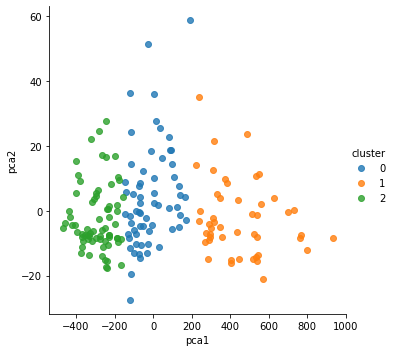

In [130]:
fig = sns.lmplot(x='pca1',y='pca2',data=kmeans_3,hue='cluster',fit_reg=False)

In [131]:
wine_all = pd.read_csv('../data/wine.csv')

In [132]:
kmeans_3 = pd.concat([kmeans_3,wine_all['Cultivar']],axis=1)

In [133]:
kmeans_3

,cluster,pca1,pca2,Cultivar
0,1,318.562979,21.492131,1
1,1,303.097420,-5.364718,1
2,1,438.061133,-6.537309,1
3,1,733.240139,0.192729,1
4,0,-11.571428,18.489995,1
...,...,...,...,...
173,0,-6.980211,-4.541137,3
174,0,3.131605,2.335191,3
175,0,88.458074,18.776285,3
176,0,93.456242,18.670819,3


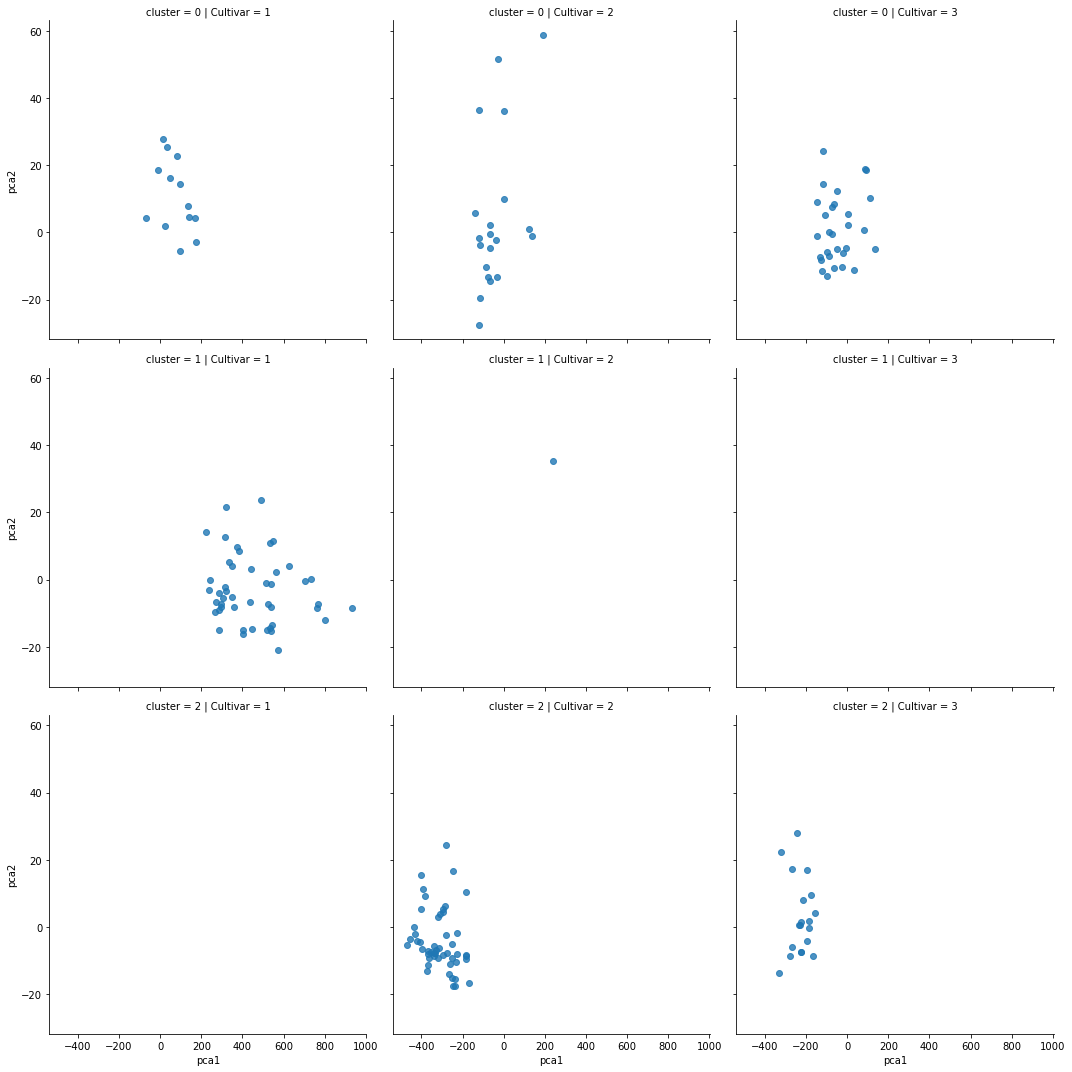

In [134]:
fig = sns.lmplot(x='pca1',y='pca2',data=kmeans_3,fit_reg=False,row='cluster',col='Cultivar')

In [135]:
#层次聚类

In [136]:
from scipy.cluster import hierarchy

In [137]:
wine_complete = hierarchy.complete(wine)

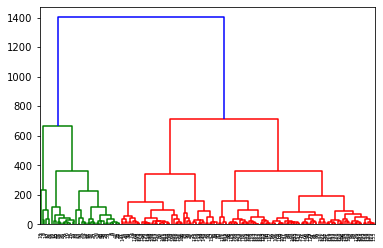

In [138]:
fig = plt.figure()
dn = hierarchy.dendrogram(wine_complete)
plt.show()

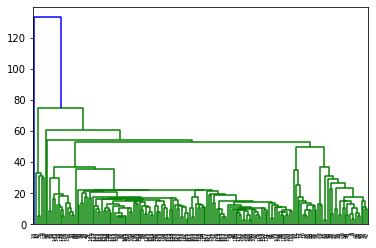

In [139]:
wine_single = hierarchy.single(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_single)
plt.show()

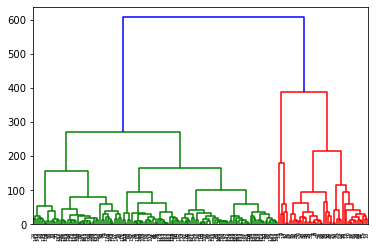

In [140]:
wine_average = hierarchy.average(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_average)
plt.show()

In [141]:
#k折交叉验证

In [142]:
from sklearn.model_selection import KFold, cross_val_score
housing = pd.read_csv('../data/housing_renamed.csv')
housing.boro[housing.boro.duplicated().values==0]

0           Manhattan
1380         Brooklyn
2097           Queens
2531            Bronx
2600    Staten Island
Name: boro, dtype: object

In [143]:
kf = KFold(n_splits = 5)
y, X = dmatrices('value_per_sq_ft ~ units + sq_ft + boro', housing)

In [144]:
X

DesignMatrix with shape (2626, 7)
  Columns:
    ['Intercept',
     'boro[T.Brooklyn]',
     'boro[T.Manhattan]',
     'boro[T.Queens]',
     'boro[T.Staten Island]',
     'units',
     'sq_ft']
  Terms:
    'Intercept' (column 0)
    'boro' (columns 1:5)
    'units' (column 5)
    'sq_ft' (column 6)
  (to view full data, use np.asarray(this_obj))

In [145]:
kf.split(X)

<generator object _BaseKFold.split at 0x000001679622EF68>

In [160]:
scores = []
scores1 = []

In [161]:
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    lr = LinearRegression().fit(X_train,y_train)
    scores.append(lr.score(X_test,y_test))
    scores1.append(lr.score(X_train,y_train))
print(scores)
print(scores1)

[0.027314162909386153, -0.5538362212297483, -0.1563637168803247, -0.323420206185989, -1.692965558624492]
[0.6130861934050011, 0.5446724759423041, 0.7109445615975148, 0.5444619492624416, 0.5317118815658423]


In [153]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[ 0.02731416 -0.55383622 -0.15636372 -0.32342021 -1.69296556]
